In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/YOUNES/jup/fashion-mnist_test.csv/fashion-mnist_train.csv')

In [4]:
data = np.array(data)
x_train = data[:,1:] / 255.
y_train = data[:,0]

In [5]:
def iniparms():
    W1 = np.random.uniform(-1,1,(128,784))
    W2 = np.random.uniform(-1,1,(10,128))
    B1 = np.random.uniform(-1,1,(128,1))
    B2 = np.random.uniform(-1,1,(10,1))
    return W1,W2,B1,B2

def relu(x):
    return np.maximum(x,0)
def drelu(x):
    return np.where(x<0 ,0 ,1)

def softmax(x):
    p = np.exp(x)/ np.sum(np.exp(x),axis=0)
    return p
    
def one_hot_encode(vector):
    unique_values = np.unique(vector)
    num_values = len(unique_values)
    encoding = np.zeros((len(vector), num_values), dtype=int)
    for i, value in enumerate(vector):
        index = np.where(unique_values == value)[0]
        encoding[i, index] = 1 
    return encoding

def fprop(x,W1,W2,B1,B2):
    Z1 = W1.dot(x.T) + B1
    A1 = relu(Z1)
    Z2 = W2.dot(A1)+B2
    A2=softmax(Z2)
    return Z1,Z2,A1,A2
def bprop(x,y,Z1,Z2,A1,A2,W2):
    DZ2 = A2 - one_hot_encode(y).T
    DW2 = 1/len(y)* DZ2.dot(A1.T)
    DB2 = 1/len(y)* np.sum(DZ2)
    
    DZ1 = W2.T.dot(DZ2)*drelu(Z1)
    DW1 = 1/len(y)* DZ1.dot(x)
    DB1 = 1/len(y)* np.sum(DZ1)
    return DW1 , DW2 , DB1,DB2

def NN(x,y,W1,W2,B1,B2,LR=0.1,n=1000):
    j=0
    while j < n:
        Z1,Z2,A1,A2 = fprop(x,W1,W2,B1,B2)
        DW1 , DW2 , DB1,DB2 = bprop(x,y,Z1,Z2,A1,A2,W2)
        W2 = W2 - LR * DW2
        W1 = W1 - LR * DW1
        B1 = B1 - LR * DB1
        B2 = B2 - LR * DB2
        if j % 20 == 0:
            pred = np.argmax(A2,axis=0)
            print('ACC: ', np.mean(pred == y)*100)
        j = j +1 
    return W1,W2,B1,B2

In [6]:
W1,W2,B1,B2 =iniparms()
W1,W2,B1,B2 = NN(x_train,y_train,W1,W2,B1,B2,LR=0.1,n=1000)

ACC:  7.956666666666666
ACC:  50.52166666666666
ACC:  54.06666666666666
ACC:  56.361666666666665
ACC:  58.285
ACC:  59.67333333333333
ACC:  60.906666666666666
ACC:  61.875
ACC:  62.68166666666667
ACC:  63.391666666666666
ACC:  64.09
ACC:  64.70333333333333
ACC:  65.315
ACC:  65.78333333333333
ACC:  66.26833333333333
ACC:  66.735
ACC:  67.125
ACC:  67.56833333333333
ACC:  67.92833333333334
ACC:  68.25833333333333
ACC:  68.595
ACC:  68.88833333333334
ACC:  69.245
ACC:  68.53833333333334
ACC:  68.91333333333334
ACC:  69.345
ACC:  69.62333333333333
ACC:  69.89999999999999
ACC:  70.165
ACC:  70.44500000000001
ACC:  70.67833333333333
ACC:  70.96833333333333
ACC:  71.25833333333334
ACC:  71.49666666666667
ACC:  71.69
ACC:  71.86666666666667
ACC:  72.015
ACC:  72.205
ACC:  72.37333333333333
ACC:  72.55666666666667
ACC:  72.71833333333333
ACC:  72.86333333333333
ACC:  73.005
ACC:  73.15
ACC:  73.33333333333333
ACC:  73.44666666666667
ACC:  73.57666666666667
ACC:  73.69833333333334
ACC:  73.8266

In [12]:
def predict(x,y,W1 , W2  ,B1, B2):
    _,_,_,PA3 = fprop(x,W1,W2,B1,B2)
    tpredictions = np.argmax(PA3, axis=0)
    taccuracy = np.mean(tpredictions == y) * 100
    return tpredictions , taccuracy

import matplotlib.pyplot as plt
def pva(tpredictions,y_test,n):
    L  = ["T-shirt/top" , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal', 'Shirt' ,'Sneaker','Bag','Ankle boot']
    print('Prediction is', L[tpredictions[n]])
    print("Actual is", L[y_test[n]])
    image = x_test[n,0:].reshape((28, 28))
    plt.imshow(image, cmap='gray', interpolation='none')
    plt.axis('off')
    plt.show()

In [7]:
tdata = pd.read_csv('C:/Users/YOUNES/jup/fashion-mnist_test.csv/fashion-mnist_test.csv')
tdata = np.array(tdata)
x_test = tdata[:,1:] / 255.
y_test = tdata[:,0]

In [18]:
tpredictions , taccuracy = predict(x_test,y_test,W1 , W2  ,B1, B2)

In [19]:
taccuracy

73.92

Prediction is Trouser
Actual is Trouser


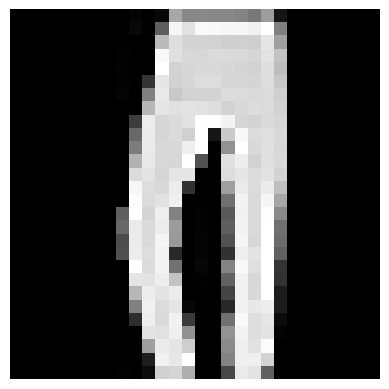

In [23]:
pva(tpredictions,y_test,23)